In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer  #String to numeric.When maximum column is string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords') #Stopwords = commonly used english words
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aspir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aspir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data = pd.read_csv('C:/Users/Aspir/Documents/Spam/static/spam.csv')
data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   
5572  spam  Congrats xxxxxxxx, Rs.82,850/- Credited to you...        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  
5572        NaN        NaN  

[5573 rows x 5 columns]

In [7]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name
5572  spam  Congrats xxxxxxxx, Rs.82,850/- Credited to you...

[5573 rows x 2 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5573 non-null   object
 1   v2      5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5573 non-null   object
 1   v2      5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
le = LabelEncoder()
data['v1'] = le.fit_transform(data['v1'])
print(data['v1'])

0       0
1       0
2       1
3       0
4       0
       ..
5568    0
5569    0
5570    0
5571    0
5572    1
Name: v1, Length: 5573, dtype: int32


In [11]:
stp_words = stopwords.words('english')
def clean_message(message):
    clean_message = " ".join(word for word in message.split() if word not in stp_words)
    return clean_message

data['v2'] = data['v2'].apply(clean_message)
print(data.v2)

# def lower_message(message):
#     lower_message = " ".join(word for word in message.lower())
#     return lower_message

# data['v2'] = data['v2'].apply(lower_message)
# print(data.v2)

0       Go jurong point, crazy.. Available bugis n gre...
1                           Ok lar... Joking wif u oni...
2       Free entry 2 wkly comp win FA Cup final tkts 2...
3               U dun say early hor... U c already say...
4               Nah I think goes usf, lives around though
                              ...                        
5568                   Will Ì_ b going esplanade fr home?
5569             Pity, * mood that. So...any suggestions?
5570    The guy bitching I acted like i'd interested b...
5571                                  Rofl. Its true name
5572    Congrats xxxxxxxx, Rs.82,850/- Credited Rummy ...
Name: v2, Length: 5573, dtype: object


In [12]:
data['v1'].value_counts()

v1
0    4825
1     748
Name: count, dtype: int64

v1
0    4825
1     748
Name: count, dtype: int64


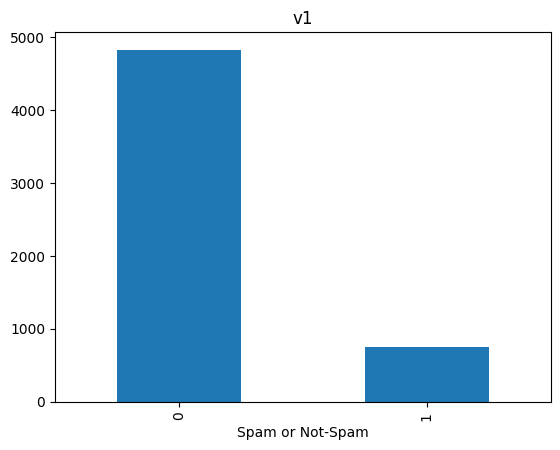

In [13]:
trans = data['v1'].value_counts()
print(trans)
trans.plot.bar()
plt.title('v1')
plt.xlabel("Spam or Not-Spam")
plt.show()

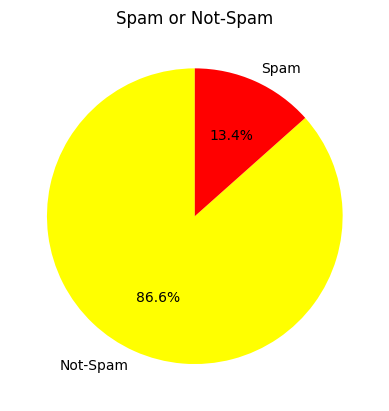

In [14]:
x = data['v1'].value_counts()
y = 'Not-Spam', 'Spam'

plt.pie(x,labels = y,autopct = '%1.1f%%',startangle = 90,colors = ['yellow','red'])
plt.title('Spam or Not-Spam')
plt.show()

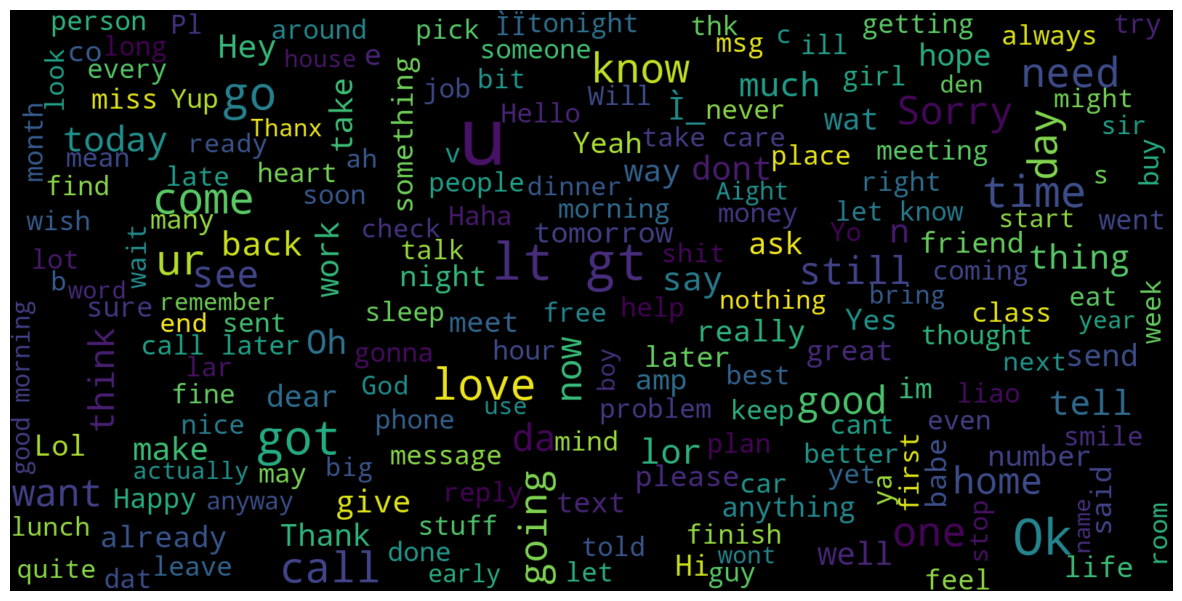

In [15]:
consolidated = ' '.join(word for word in data['v2'][data['v1'] == 0].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()

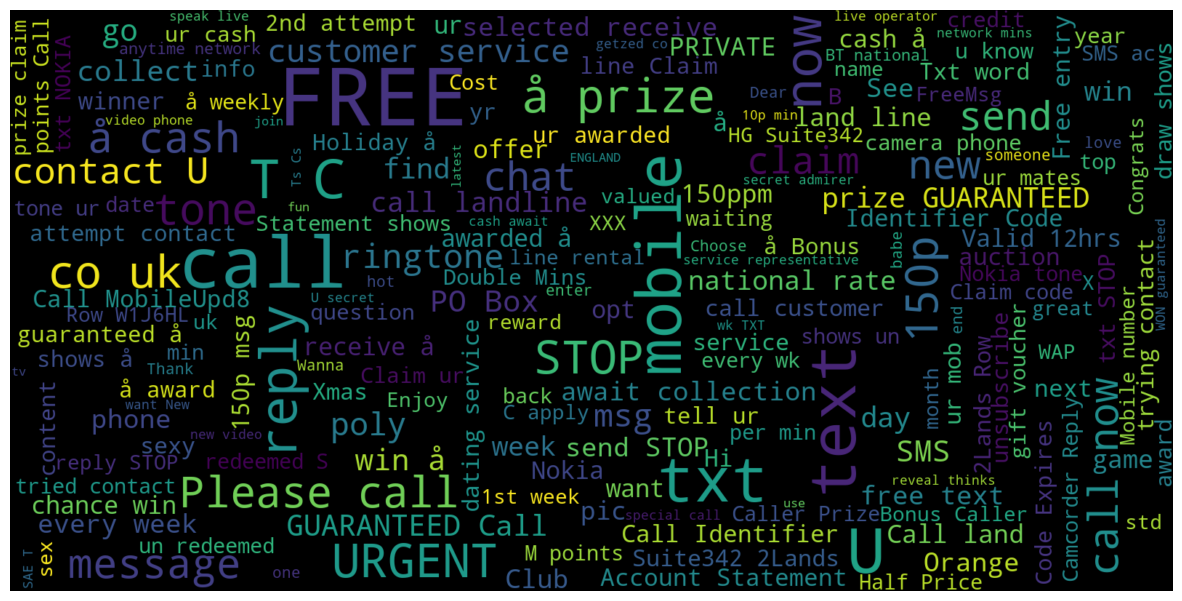

In [16]:
consolidated = ' '.join(word for word in data['v2'][data['v1'] == 1].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [17]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['v2']).toarray()
print(X)

Y = data['v1']

with open('cv.pkl','wb') as file:
    pickle.dump(cv, file)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
from imblearn.over_sampling import SMOTE

#Initialize SMOTE with a sampling strategy (you can adjust it as needed)
smote = SMOTE(sampling_strategy = 'auto',random_state = 42)

#Apply SMOTE to resample the dataset
X_resampled,y_resampled = smote.fit_resample(X,Y)
y_resampled.value_counts()

v1
0    4825
1    4825
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [20]:
print(x_train)
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
print(x_train.shape)
print(x_test.shape)

(4179, 2500)
(1394, 2500)


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred = model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))
print(pred)

import pickle
pickle.dump(model,open('model_save.pkl','wb'))

model = pickle.load(open('model_save.pkl','rb'))

0.9727403156384505
[0 0 0 ... 1 0 0]


In [23]:
def predict_sentiment(message_text):
    #Preprocess the input review
    cleaned_message = clean_message(message_text)
    #Transfrom the review using the TF-IDF vectorizer    
    transformed_message = cv.transform([cleaned_message]).toarray()
    #Predict sentiment using the trained model    
    prediction = model.predict(transformed_message)

    if prediction[0] == 1:
        return 'Spam'
    else:
        return 'Not-Spam'

#Now you can use the predict_sentiment function to classify reviews
input_message = input('Enter the Mail::')
result = predict_sentiment(input_message)
print(f'This Mail is {result}')

This Mail is Spam
